## Exploratory Data Analysis for the Cholesterol and Hypertension Dataset

### Danae McCulloch 
#### DATA 604 Report

### Link to Datasets

The following links access the datasets:

- Hypertension Dataset: https://www.who.int/data/gho/data/indicators/indicator-details/GHO/prevalence-of-hypertension-among-adults-aged-30-79-years
- Cholesterol Dataset:  https://www.who.int/data/gho/data/indicators/indicator-details/GHO/mean-total-cholesterol-(age-standardized-estimate)
- Mortality Dataset: https://www.who.int/data/gho/data/indicators/indicator-details/GHO/number-of-deaths-attributed-to-non-communicable-diseases-by-type-of-disease-and-sex
- World Health Organization. (n.d.). Noncommunicable diseases: Risk factors. WHO. 			   https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/ncd-risk-factors. 

In [343]:
import pandas as pd
import sqlalchemy as sq
import pymysql
import seaborn as sns 
import matplotlib.pyplot as plt

In [345]:
username = 'root'
password = 'Canmore2024!?'
host = 'localhost'  
port = '3306'       
database = 'assignment3'

# Create the connection URL
connection_url = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"

engine = sq.create_engine(connection_url)

In [153]:
hypertension =  pd.read_csv("/Users/danaemcculloch/Desktop/604 Project/Global_Hypertension.csv", encoding='ISO-8859-1')
cholesterol= pd.read_csv("/Users/danaemcculloch/Desktop/604 Project/Global_Cholesterol.csv", encoding='ISO-8859-1')
mortality = pd.read_csv("/Users/danaemcculloch/Desktop/604 Project/Global_Moratlity.csv", encoding='ISO-8859-1')

In [163]:
#Renaming the columns for hypertension 

hypertension.rename(columns={"ParentLocation":"Region","Location":"Country","Period":"Year", "Dim1":"Gender", 
                            "FactValueNumeric":"Hypertension_Value",
                            "FactValueNumericLow":"Hypertension_Low_Value",
                            "FactValueNumericHigh":"Hypertension_High_Value",
                             "Value":"Range"
                            }, inplace=True)
hypertension.head()



,Indicator,Region,Country,Year,Gender,Hypertension_Value,Hypertension_Low_Value,Hypertension_High_Value,Range
0,Prevalence of hypertension among adults aged 3...,Europe,Switzerland,2019,Female,17.5,11.9,24.2,17.5 [11.9-24.2]
1,Prevalence of hypertension among adults aged 3...,Americas,Peru,2019,Female,18.4,15.3,21.8,18.4 [15.3-21.8]
2,Prevalence of hypertension among adults aged 3...,Americas,Canada,2019,Female,19.9,16.0,24.4,19.9 [16.0-24.4]
3,Prevalence of hypertension among adults aged 3...,Americas,Peru,2019,Both sexes,20.7,18.2,23.3,20.7 [18.2-23.3]
4,Prevalence of hypertension among adults aged 3...,Europe,Spain,2019,Female,20.8,15.7,26.5,20.8 [15.7-26.5]


In [165]:
#Renaming the columns for cholesterol 

cholesterol.rename(columns={"ParentLocation":"Region","Location":"Country","Period":"Year", "Dim1":"Gender", 
                            "FactValueNumeric":"Cholesterol_Value",
                            "FactValueNumericLow":"Cholesterol_Low_Value",
                            "FactValueNumericHigh":"Cholesterol_High_Value",
                            "Value":"Range"
                            }, inplace=True)
cholesterol.head()

,Indicator,Region,Country,Year,Gender,Cholesterol_Value,Cholesterol_Low_Value,Cholesterol_High_Value,Range
0,"Mean total cholesterol, age-standardized",Africa,Lesotho,2018,Male,3.6,3.1,4.1,3.6 [3.1-4.1]
1,"Mean total cholesterol, age-standardized",Africa,Rwanda,2018,Male,3.6,3.2,4.1,3.6 [3.2-4.1]
2,"Mean total cholesterol, age-standardized",Africa,Malawi,2018,Male,3.6,3.3,3.9,3.6 [3.3-3.9]
3,"Mean total cholesterol, age-standardized",Africa,Nigeria,2018,Male,3.7,3.1,4.3,3.7 [3.1-4.3]
4,"Mean total cholesterol, age-standardized",Africa,Burkina Faso,2018,Male,3.7,3.2,4.1,3.7 [3.2-4.1]


In [167]:
#Renaming the columns for mortality 

mortality.rename(columns={"ParentLocation":"Region","Location":"Country","Period":"Year", "Dim1":"Gender", 
                            "Dim2":"Disease",
                            "FactValueNumeric":"Mortality_Value",
                            "FactValueNumericLow":"Mortality_Low_Value",
                            "FactValueNumericHigh":"Mortality_High_Value", 
                             "Value":"Range"}
                            , inplace=True)
mortality.head()

,Region,Country,Year,Gender,Disease,Mortality_Value,Mortality_Low_Value,Mortality_High_Value,Range
0,South-East Asia,Timor-Leste,2019,Male,Diabetes mellitus,99.53,49.54,167.8,100 [50-168]
1,South-East Asia,Bhutan,2019,Female,Diabetes mellitus,100.20,56.06,163.0,100 [56-163]
2,Europe,Montenegro,2019,Both sexes,Respiratory diseases,100.00,63.92,145.0,100 [64-145]
3,Africa,Seychelles,2019,Male,Malignant neoplasms,99.63,66.17,144.1,100 [66-144]
4,Africa,Lesotho,2019,Male,Diabetes mellitus,1003.00,580.00,1612.0,1003 [580-1612]


In [195]:
#Creating SQL tables

hypertension.to_sql("hypertension_table", engine, index=False,if_exists='replace') 
hypertension_table_df= pd.read_sql_table("hypertension_table", engine) 

cholesterol.to_sql("cholesterol_table", engine, index=False,if_exists='replace')
cholesterol_table_df = pd.read_sql_table("cholesterol_table", engine)

mortality.to_sql("mortality_table", engine, index=False,if_exists='replace')
mortality_table_df= pd.read_sql_table("mortality_table", engine)

In [277]:
#Hypertension trend in Canada from 2000 to 2018 

query = """ SELECT Country, Year, Gender, Hypertension_Value, Hypertension_Low_Value, Hypertension_High_Value
FROM hypertension_table 
  WHERE Year >= '2000' 
  AND Year <= '2018' 
  AND Country = 'Canada'
  AND Gender != 'Both sexes';"""
pd.read_sql_query(query, engine) 

,Country,Year,Gender,Hypertension_Value,Hypertension_Low_Value,Hypertension_High_Value
0,Canada,2018,Female,20.2,16.8,24.1
1,Canada,2018,Male,24.5,20.6,28.6
2,Canada,2017,Female,20.5,17.4,24.0
3,Canada,2017,Male,24.8,21.2,28.4
4,Canada,2016,Female,20.8,17.9,24.0
5,Canada,2016,Male,25.0,21.6,28.4
6,Canada,2015,Female,21.0,18.3,24.0
7,Canada,2015,Male,25.3,22.0,28.6
8,Canada,2014,Female,21.3,18.6,24.2
9,Canada,2014,Male,25.6,22.4,28.9


In [279]:
#Cholesterol trend in Canada from 2000 to 2018 
query = """ SELECT Country, Year, Gender, Cholesterol_Value, Cholesterol_Low_Value, Cholesterol_High_Value
FROM cholesterol_table 
WHERE Year >= '2000' 
  AND Year <= '2018' 
  AND Country = 'Canada'
  AND Gender != 'Both sexes';"""
pd.read_sql_query(query, engine) 

,Country,Year,Gender,Cholesterol_Value,Cholesterol_Low_Value,Cholesterol_High_Value
0,Canada,2018,Male,4.6,4.3,4.8
1,Canada,2018,Female,4.7,4.4,5.0
2,Canada,2017,Male,4.6,4.3,4.8
3,Canada,2017,Female,4.7,4.5,5.0
4,Canada,2016,Male,4.6,4.4,4.8
5,Canada,2016,Female,4.7,4.5,4.9
6,Canada,2015,Male,4.7,4.5,4.9
7,Canada,2015,Female,4.8,4.6,5.0
8,Canada,2014,Male,4.7,4.5,4.9
9,Canada,2014,Female,4.8,4.6,5.0


In [231]:
#Joining the combined Hypertension data with Mortality regarding Cardiovascular disease to find trend
query = """ 
SELECT h.Country, h.Year, h.Gender,  h.Hypertension_Value, m.Mortality_Value, m.Disease FROM hypertension_table h
    JOIN mortality_table m ON h.Year = m.Year AND h.Gender = m.Gender and h.Country=m.Country
    WHERE h.Country = 'Canada' AND h.Year BETWEEN 2000 AND 2018 
    AND h.Gender= 'Both sexes' AND m.Disease = 'Cardiovascular diseases';
"""
pd.read_sql_query(query, engine) 

,Country,Year,Gender,Hypertension_Value,Mortality_Value,Disease
0,Canada,2018,Both sexes,22.4,70147.0,Cardiovascular diseases
1,Canada,2017,Both sexes,22.6,71372.0,Cardiovascular diseases
2,Canada,2016,Both sexes,22.9,69553.0,Cardiovascular diseases
3,Canada,2015,Both sexes,23.1,69548.0,Cardiovascular diseases
4,Canada,2014,Both sexes,23.4,68507.0,Cardiovascular diseases
5,Canada,2013,Both sexes,23.7,67296.0,Cardiovascular diseases
6,Canada,2012,Both sexes,24.0,65860.0,Cardiovascular diseases
7,Canada,2011,Both sexes,24.3,65294.0,Cardiovascular diseases
8,Canada,2010,Both sexes,24.6,66670.0,Cardiovascular diseases
9,Canada,2009,Both sexes,24.9,67611.0,Cardiovascular diseases


In [245]:
#Looking at trend between respiratory disease mortality and hypertension

query = """ 
SELECT h.Country, h.Year, h.Gender,  h.Hypertension_Value, m.Mortality_Value, m.Disease FROM hypertension_table h
    JOIN mortality_table m ON h.Year = m.Year AND h.Gender = m.Gender and h.Country=m.Country
    WHERE h.Country = 'Canada' AND h.Year BETWEEN 2000 AND 2018 
    AND h.Gender= 'Both sexes' AND m.Disease = 'Respiratory diseases';
"""
pd.read_sql_query(query, engine) 

,Country,Year,Gender,Hypertension_Value,Mortality_Value,Disease
0,Canada,2018,Both sexes,22.4,19700.0,Respiratory diseases
1,Canada,2017,Both sexes,22.6,19973.0,Respiratory diseases
2,Canada,2016,Both sexes,22.9,18990.0,Respiratory diseases
3,Canada,2015,Both sexes,23.1,18873.0,Respiratory diseases
4,Canada,2014,Both sexes,23.4,17989.0,Respiratory diseases
5,Canada,2013,Both sexes,23.7,17848.0,Respiratory diseases
6,Canada,2012,Both sexes,24.0,17670.0,Respiratory diseases
7,Canada,2011,Both sexes,24.3,17578.0,Respiratory diseases
8,Canada,2010,Both sexes,24.6,16903.0,Respiratory diseases
9,Canada,2009,Both sexes,24.9,16665.0,Respiratory diseases


In [255]:
#Looking at trend between diabetes mortality and hypertension

query = """ 
SELECT h.Country, h.Year, h.Gender,  h.Hypertension_Value, m.Mortality_Value, m.Disease FROM hypertension_table h
    JOIN mortality_table m ON h.Year = m.Year AND h.Gender = m.Gender and h.Country=m.Country
    WHERE h.Country = 'Canada' AND h.Year BETWEEN 2000 AND 2018 
    AND h.Gender= 'Both sexes' AND m.Disease = 'Diabetes mellitus';
"""
pd.read_sql_query(query, engine) 

,Country,Year,Gender,Hypertension_Value,Mortality_Value,Disease
0,Canada,2018,Both sexes,22.4,6883.0,Diabetes mellitus
1,Canada,2017,Both sexes,22.6,7002.0,Diabetes mellitus
2,Canada,2016,Both sexes,22.9,6962.0,Diabetes mellitus
3,Canada,2015,Both sexes,23.1,7230.0,Diabetes mellitus
4,Canada,2014,Both sexes,23.4,7091.0,Diabetes mellitus
5,Canada,2013,Both sexes,23.7,7056.0,Diabetes mellitus
6,Canada,2012,Both sexes,24.0,7003.0,Diabetes mellitus
7,Canada,2011,Both sexes,24.3,7232.0,Diabetes mellitus
8,Canada,2010,Both sexes,24.6,6964.0,Diabetes mellitus
9,Canada,2009,Both sexes,24.9,6938.0,Diabetes mellitus


In [257]:
#Looking at trend between cancer mortality and hypertension

query = """ 
SELECT h.Country, h.Year, h.Gender,  h.Hypertension_Value, m.Mortality_Value, m.Disease FROM hypertension_table h
    JOIN mortality_table m ON h.Year = m.Year AND h.Gender = m.Gender and h.Country=m.Country
    WHERE h.Country = 'Canada' AND h.Year BETWEEN 2000 AND 2018 
    AND h.Gender= 'Both sexes' AND m.Disease = 'Malignant neoplasms';
"""
pd.read_sql_query(query, engine) 

,Country,Year,Gender,Hypertension_Value,Mortality_Value,Disease
0,Canada,2018,Both sexes,22.4,80881.0,Malignant neoplasms
1,Canada,2017,Both sexes,22.6,80994.0,Malignant neoplasms
2,Canada,2016,Both sexes,22.9,80696.0,Malignant neoplasms
3,Canada,2015,Both sexes,23.1,78020.0,Malignant neoplasms
4,Canada,2014,Both sexes,23.4,77763.0,Malignant neoplasms
5,Canada,2013,Both sexes,23.7,75755.0,Malignant neoplasms
6,Canada,2012,Both sexes,24.0,74983.0,Malignant neoplasms
7,Canada,2011,Both sexes,24.3,73328.0,Malignant neoplasms
8,Canada,2010,Both sexes,24.6,72535.0,Malignant neoplasms
9,Canada,2009,Both sexes,24.9,71726.0,Malignant neoplasms


In [239]:
#Looking at trend between cardiovascular disease mortality and cholesterol 

query = """ 
SELECT c.Country, c.Year, c.Gender, c.Cholesterol_Value, m.Mortality_Value, m.Disease FROM cholesterol_table c
    JOIN mortality_table m ON c.Year = m.Year AND c.Gender = m.Gender and c.Country=m.Country
    WHERE c.Country = 'Canada' AND c.Year BETWEEN 2000 AND 2018 
    AND c.Gender= 'Both sexes' AND m.Disease = 'Cardiovascular diseases';
"""
pd.read_sql_query(query, engine) 


,Country,Year,Gender,Cholesterol_Value,Mortality_Value,Disease
0,Canada,2018,Both sexes,4.6,70147.0,Cardiovascular diseases
1,Canada,2017,Both sexes,4.7,71372.0,Cardiovascular diseases
2,Canada,2016,Both sexes,4.7,69553.0,Cardiovascular diseases
3,Canada,2015,Both sexes,4.7,69548.0,Cardiovascular diseases
4,Canada,2014,Both sexes,4.7,68507.0,Cardiovascular diseases
5,Canada,2013,Both sexes,4.8,67296.0,Cardiovascular diseases
6,Canada,2012,Both sexes,4.8,65860.0,Cardiovascular diseases
7,Canada,2011,Both sexes,4.8,65294.0,Cardiovascular diseases
8,Canada,2010,Both sexes,4.9,66670.0,Cardiovascular diseases
9,Canada,2009,Both sexes,4.9,67611.0,Cardiovascular diseases


In [253]:
#Looking at trend between respiratory disease mortality and cholesterol 

query = """ 
SELECT c.Country, c.Year, c.Gender, c.Cholesterol_Value, m.Mortality_Value, m.Disease FROM cholesterol_table c
    JOIN mortality_table m ON c.Year = m.Year AND c.Gender = m.Gender and c.Country=m.Country
    WHERE c.Country = 'Canada' AND c.Year BETWEEN 2000 AND 2018 
    AND c.Gender= 'Both sexes' AND m.Disease = 'Respiratory diseases';
"""
pd.read_sql_query(query, engine) 


,Country,Year,Gender,Cholesterol_Value,Mortality_Value,Disease
0,Canada,2018,Both sexes,4.6,19700.0,Respiratory diseases
1,Canada,2017,Both sexes,4.7,19973.0,Respiratory diseases
2,Canada,2016,Both sexes,4.7,18990.0,Respiratory diseases
3,Canada,2015,Both sexes,4.7,18873.0,Respiratory diseases
4,Canada,2014,Both sexes,4.7,17989.0,Respiratory diseases
5,Canada,2013,Both sexes,4.8,17848.0,Respiratory diseases
6,Canada,2012,Both sexes,4.8,17670.0,Respiratory diseases
7,Canada,2011,Both sexes,4.8,17578.0,Respiratory diseases
8,Canada,2010,Both sexes,4.9,16903.0,Respiratory diseases
9,Canada,2009,Both sexes,4.9,16665.0,Respiratory diseases


In [247]:
#Looking at trend between diabetes mortality and cholesterol 

query = """ 
SELECT c.Country, c.Year, c.Gender, c.Cholesterol_Value, m.Mortality_Value, m.Disease FROM cholesterol_table c
    JOIN mortality_table m ON c.Year = m.Year AND c.Gender = m.Gender and c.Country=m.Country
    WHERE c.Country = 'Canada' AND c.Year BETWEEN 2000 AND 2018 
    AND c.Gender= 'Both sexes' AND m.Disease = 'Diabetes mellitus';
"""
pd.read_sql_query(query, engine) 


,Country,Year,Gender,Cholesterol_Value,Mortality_Value,Disease
0,Canada,2018,Both sexes,4.6,6883.0,Diabetes mellitus
1,Canada,2017,Both sexes,4.7,7002.0,Diabetes mellitus
2,Canada,2016,Both sexes,4.7,6962.0,Diabetes mellitus
3,Canada,2015,Both sexes,4.7,7230.0,Diabetes mellitus
4,Canada,2014,Both sexes,4.7,7091.0,Diabetes mellitus
5,Canada,2013,Both sexes,4.8,7056.0,Diabetes mellitus
6,Canada,2012,Both sexes,4.8,7003.0,Diabetes mellitus
7,Canada,2011,Both sexes,4.8,7232.0,Diabetes mellitus
8,Canada,2010,Both sexes,4.9,6964.0,Diabetes mellitus
9,Canada,2009,Both sexes,4.9,6938.0,Diabetes mellitus


In [251]:
#Looking at trend between cancer mortality and cholesterol 

query = """ 
SELECT c.Country, c.Year, c.Gender, c.Cholesterol_Value, m.Mortality_Value, m.Disease FROM cholesterol_table c
    JOIN mortality_table m ON c.Year = m.Year AND c.Gender = m.Gender and c.Country=m.Country
    WHERE c.Country = 'Canada' AND c.Year BETWEEN 2000 AND 2018 
    AND c.Gender= 'Both sexes' AND m.Disease = 'Malignant neoplasms';
"""
pd.read_sql_query(query, engine) 


,Country,Year,Gender,Cholesterol_Value,Mortality_Value,Disease
0,Canada,2018,Both sexes,4.6,80881.0,Malignant neoplasms
1,Canada,2017,Both sexes,4.7,80994.0,Malignant neoplasms
2,Canada,2016,Both sexes,4.7,80696.0,Malignant neoplasms
3,Canada,2015,Both sexes,4.7,78020.0,Malignant neoplasms
4,Canada,2014,Both sexes,4.7,77763.0,Malignant neoplasms
5,Canada,2013,Both sexes,4.8,75755.0,Malignant neoplasms
6,Canada,2012,Both sexes,4.8,74983.0,Malignant neoplasms
7,Canada,2011,Both sexes,4.8,73328.0,Malignant neoplasms
8,Canada,2010,Both sexes,4.9,72535.0,Malignant neoplasms
9,Canada,2009,Both sexes,4.9,71726.0,Malignant neoplasms


In [261]:
#Canada hypertension rank compared to the rest of the world in 2000
query = """ WITH Ranked_Hypertension AS (SELECT Country, Hypertension_Value, RANK() OVER (ORDER BY Hypertension_Value DESC) AS Rank_Hypertension
    FROM hypertension_table WHERE Gender = 'Both sexes' AND Year = 2000) SELECT Country, Hypertension_Value, Rank_Hypertension
    FROM Ranked_Hypertension WHERE Country = 'Canada';"""

ranked_data = pd.read_sql_query(query, engine)
print("Canada rank for 2000 out of 195 countries")
ranked_data.head()

Canada rank for 2000 out of 195 countries


,Country,Hypertension_Value,Rank_Hypertension
0,Canada,28.2,180


In [233]:
#Canada hypertension rank compared to the rest of the world in 2018

query = """ WITH Ranked_Hypertension AS (SELECT Country, Hypertension_Value, RANK() OVER (ORDER BY Hypertension_Value DESC) AS Rank_Hypertension
    FROM hypertension_table WHERE Gender = 'Both sexes' AND Year = 2018) SELECT Country, Hypertension_Value, Rank_Hypertension
    FROM Ranked_Hypertension WHERE Country = 'Canada';"""
ranked_data = pd.read_sql_query(query, engine)
print("Canada rank for 2018 out of 195 countries")
ranked_data.head()

Canada rank for 2018 out of 195 countries


,Country,Hypertension_Value,Rank_Hypertension
0,Canada,22.4,192


In [283]:
#Ranking countries based on hypertension (from highest percentage to lowest percentage).  

query = """WITH Ranked_Hypertension AS (SELECT Country, AVG(Hypertension_Value) AS Average_Hypertension, 
        RANK() OVER (ORDER BY AVG(Hypertension_Value) DESC) AS Ranked_Hypertension
    FROM hypertension_table
    WHERE Gender = 'Both sexes' AND Year >= 2000 AND Year <= 2018
    GROUP BY Country)
SELECT Country, Average_Hypertension, Ranked_Hypertension
FROM Ranked_Hypertension
WHERE Country = 'Canada';"""
print("AVG Canada rank for Hypertension is out of 195 countries")
ranked_data = pd.read_sql_query(query, engine)
ranked_data.head()

AVG Canada rank for Hypertension is out of 195 countries


,Country,Average_Hypertension,Ranked_Hypertension
0,Canada,25.042105,190


In [263]:
#Canada cholesterol rank compared to the rest of the world in 2000

query = """ WITH Ranked_Cholesterol AS (SELECT Country, Cholesterol_Value, RANK() OVER (ORDER BY Cholesterol_Value DESC) AS Rank_Cholesterol
    FROM cholesterol_table WHERE Gender = 'Both sexes' AND Year = 2000) SELECT Country, Cholesterol_Value, Rank_Cholesterol
    FROM Ranked_Cholesterol WHERE Country = 'Canada';"""

ranked_data = pd.read_sql_query(query, engine)
print("Canada rank for 2000 out of 191 countries")
ranked_data.head()

Canada rank for 2000 out of 191 countries


,Country,Cholesterol_Value,Rank_Cholesterol
0,Canada,5.2,31


In [243]:
#Canada cholesterol rank compared to the rest of the world in 2018

query = """ WITH Ranked_Cholesterol AS (SELECT Country, Cholesterol_Value, RANK() OVER (ORDER BY Cholesterol_Value DESC) AS Rank_Cholesterol
    FROM cholesterol_table WHERE Gender = 'Both sexes' AND Year = 2018) SELECT Country, Cholesterol_Value, Rank_Cholesterol
    FROM Ranked_Cholesterol WHERE Country = 'Canada';"""
ranked_data = pd.read_sql_query(query, engine)
print("Canada rank for 2018 out of 191 countries")
ranked_data.head()

Canada rank for 2018 out of 191 countries


,Country,Cholesterol_Value,Rank_Cholesterol
0,Canada,4.6,75


In [347]:
#Ranking countries based on cholesterol (from highest to lowest).  

query = """WITH Ranked_Cholesterol AS (SELECT Country, AVG(Cholesterol_Value) AS Average_Cholesterol, 
        RANK() OVER (ORDER BY AVG(Cholesterol_Value) DESC) AS Ranked_Cholesterol
    FROM cholesterol_table
    WHERE Gender = 'Both sexes' AND Year >= 2000 AND Year <= 2018
    GROUP BY Country)
SELECT Country, Average_Cholesterol, Ranked_Cholesterol
FROM Ranked_Cholesterol
WHERE Country = 'Canada';"""
print("AVG Canada rank for Cholesterol is out of 191 countries")
ranked_data = pd.read_sql_query(query, engine)
ranked_data.head()


AVG Canada rank for Cholesterol is out of 191 countries


,Country,Average_Cholesterol,Ranked_Cholesterol
0,Canada,4.894737,54


## Visualizations

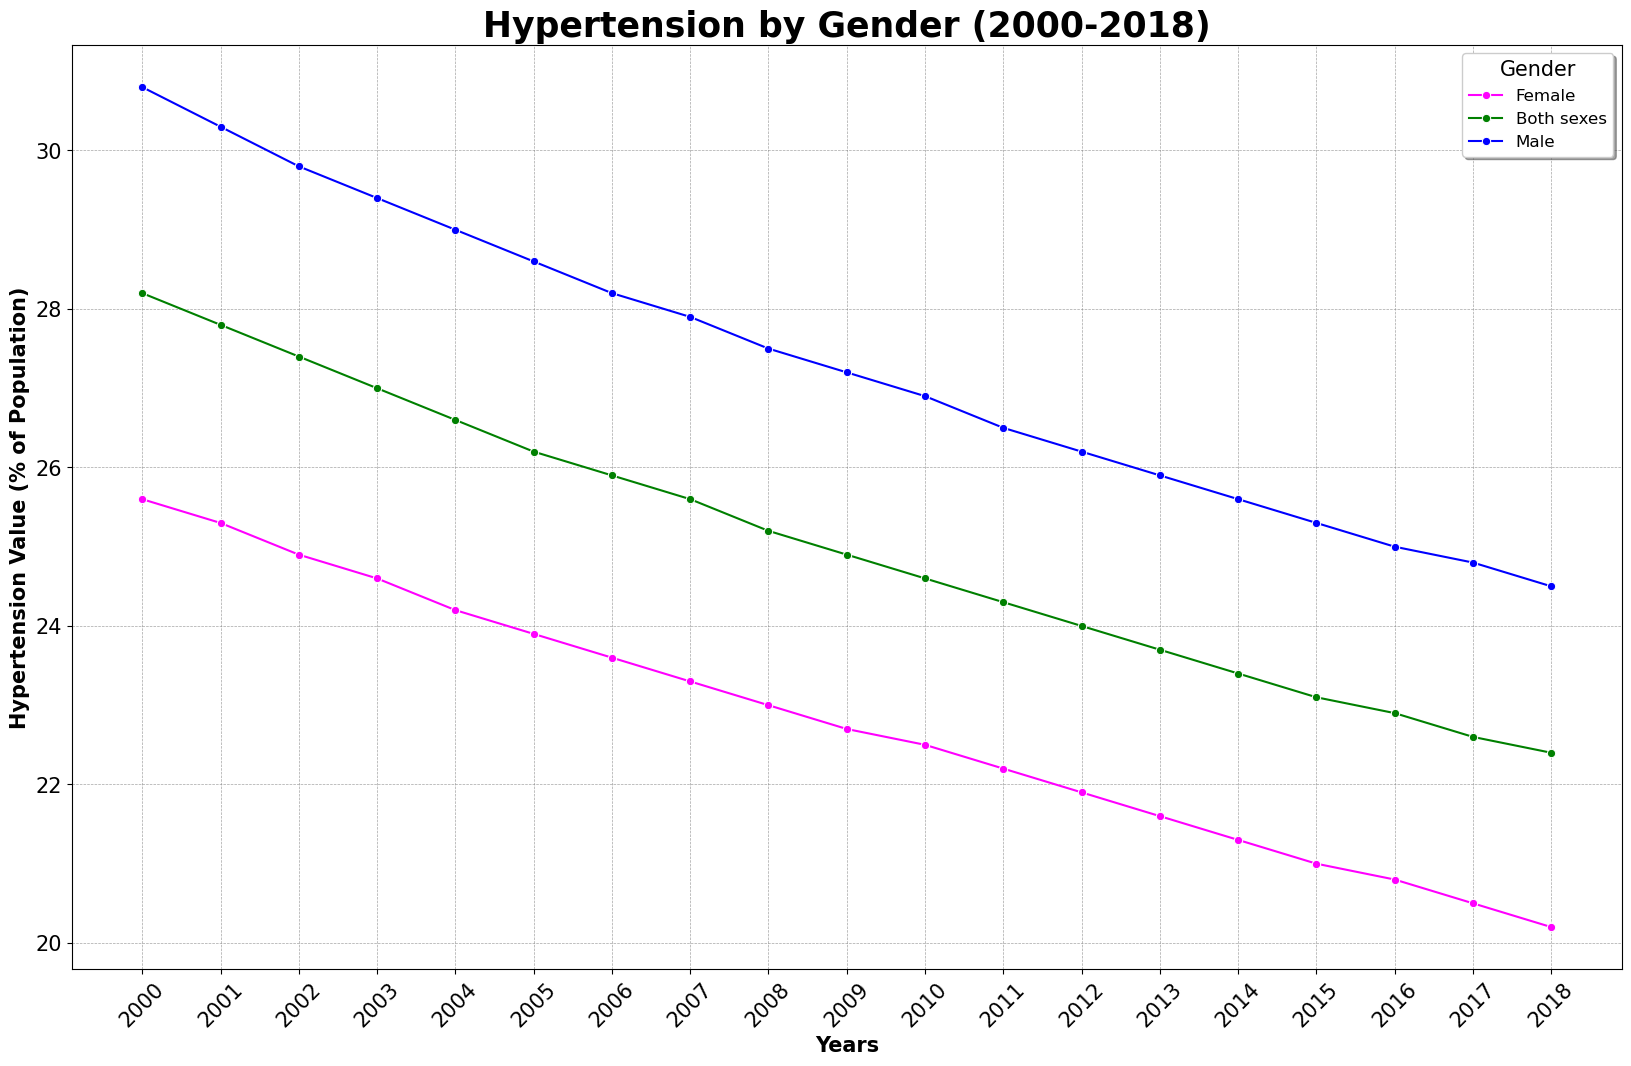

In [349]:
query_hyper_trend = """ SELECT Country, Year, Gender, Hypertension_Value
FROM hypertension_table 
  WHERE Year >= '2000' 
  AND Year <= '2018' 
  AND Country = 'Canada';"""

hypertension_trend=pd.read_sql_query(query_hyper_trend, engine)
hypertension_trend['Year'] = hypertension_trend['Year'].astype(int)
plt.figure(figsize=(20, 12))

sns.lineplot(data=hypertension_trend, x=hypertension_trend['Year'], y=hypertension_trend['Hypertension_Value'], hue='Gender', marker='o', markersize=6, palette=['Magenta','Green','Blue'])
plt.title("Hypertension by Gender (2000-2018)", fontsize=25, weight='bold')
plt.xlabel("Years", fontsize=15,weight='bold')
plt.ylabel("Hypertension Value (% of Population)", fontsize=15, weight='bold')
plt.legend(frameon=True, shadow=True, loc='upper right',fontsize=12,title="Gender", title_fontsize=15)
years = hypertension_trend['Year'].unique() 
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(years, rotation=45)
plt.xticks(ticks=years, labels=years, rotation=45,fontsize=15)
plt.yticks(fontsize=15)

# Show the plot
plt.savefig("604 Project/hypertension_trends_by_gender.png", format='png', dpi=300)
plt.show()

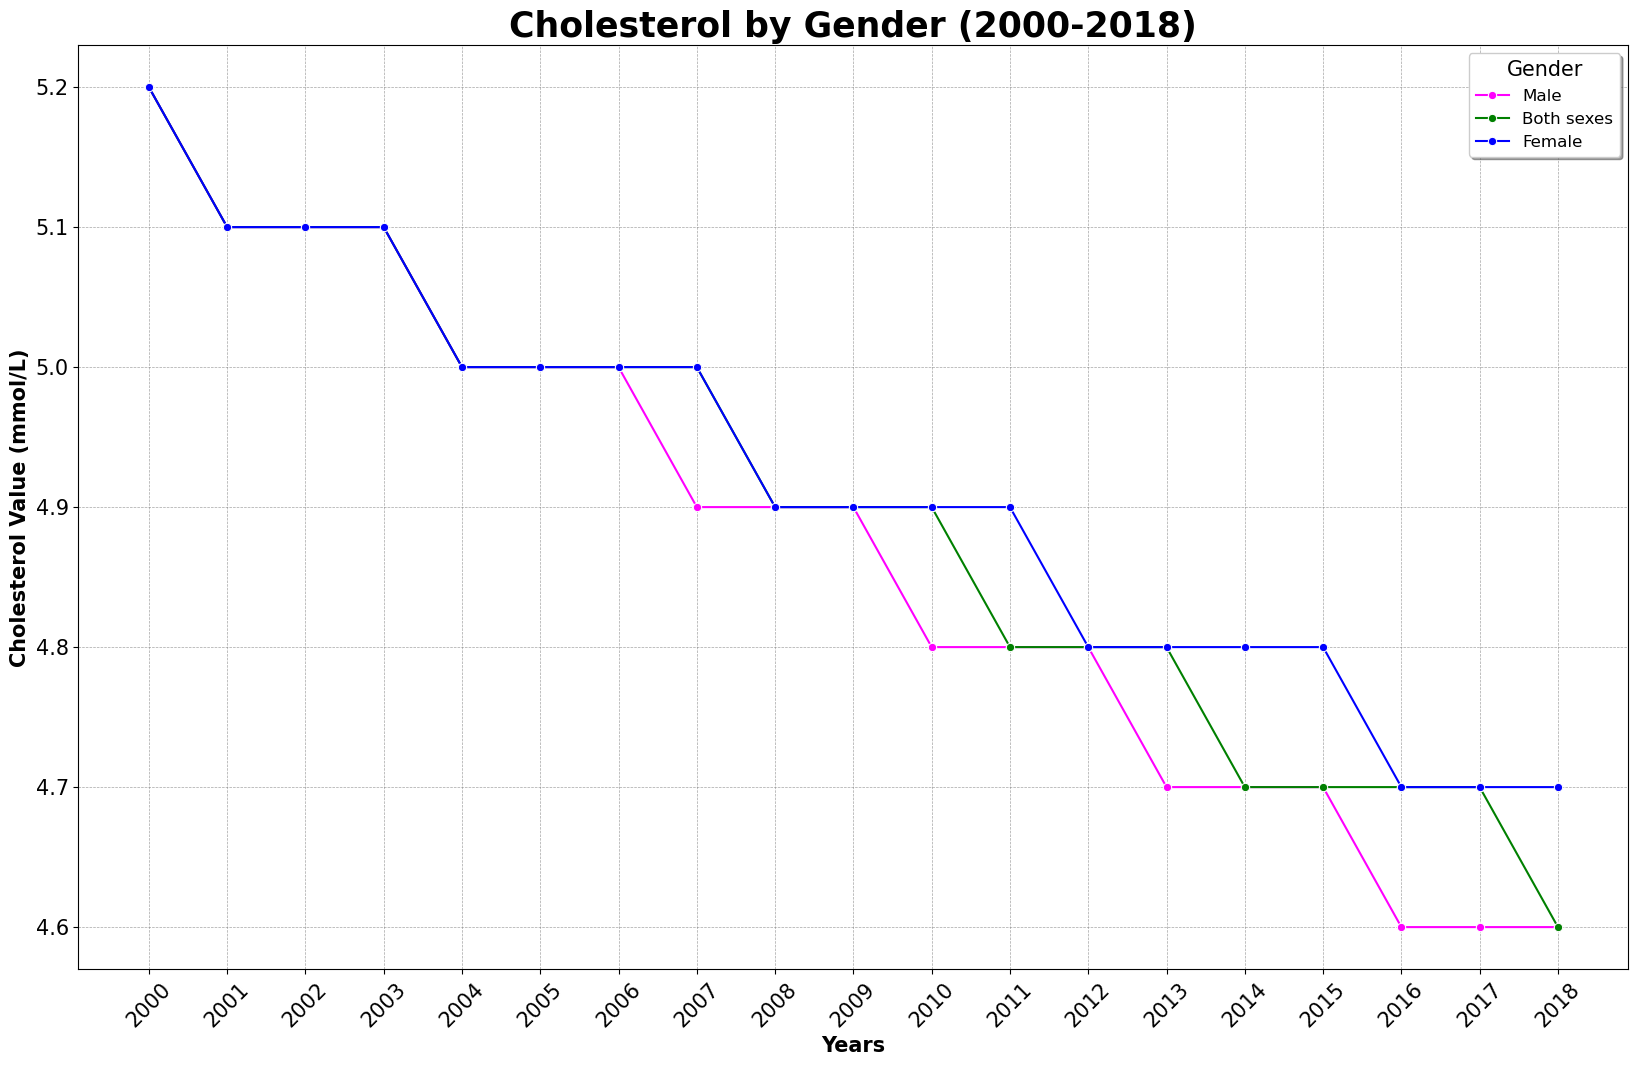

In [353]:
query_chol_trend = """ SELECT Country, Year, Gender, Cholesterol_Value
FROM cholesterol_table 
  WHERE Year >= '2000' 
  AND Year <= '2018' 
  AND Country = 'Canada';"""

cholesterol_trend=pd.read_sql_query(query_chol_trend, engine)
cholesterol_trend['Year'] = cholesterol_trend['Year'].astype(int)
plt.figure(figsize=(20, 12))

sns.lineplot(data=cholesterol_trend, x=cholesterol_trend['Year'], y=cholesterol_trend['Cholesterol_Value'], hue='Gender', marker='o', markersize=6, palette=['Magenta','Green','Blue'])
plt.title("Cholesterol by Gender (2000-2018)", fontsize=25, weight='bold')
plt.xlabel("Years", fontsize=15,weight='bold')
plt.ylabel("Cholesterol Value (mmol/L)", fontsize=15, weight='bold')
plt.legend(frameon=True, shadow=True, loc='upper right',fontsize=12,title="Gender", title_fontsize=15)
years = hypertension_trend['Year'].unique() 
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(years, rotation=45)
plt.xticks(ticks=years, labels=years, rotation=45,fontsize=15)
plt.yticks(fontsize=15)

# Show the plot
plt.savefig("604 Project/cholesterol_trends_by_gender.png", format='png', dpi=300)
plt.show()

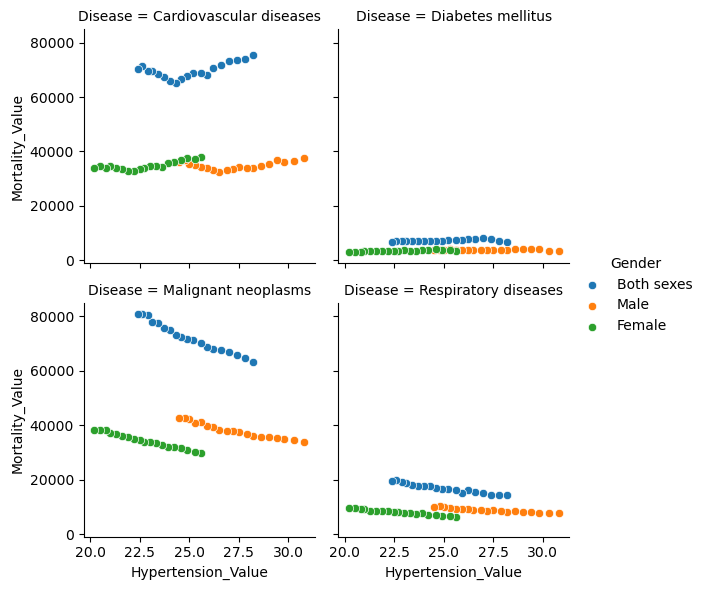

In [337]:
# Correlation between hypertension and mortality diseases
query_corr_hyp = """SELECT h.Country, h.Year, h.Gender,  h.Hypertension_Value, m.Mortality_Value, m.Disease FROM hypertension_table h
    JOIN mortality_table m ON h.Year = m.Year AND h.Gender = m.Gender and h.Country=m.Country
    WHERE h.Country = 'Canada' AND h.Year BETWEEN 2000 AND 2018 order by m.Disease, m.Year;"""   

result=pd.read_sql_query(query_corr_hyp, engine)
pivot_df = result.pivot_table(index='Year', columns='Disease', values='Mortality_Value', aggfunc='first')
pivot_df = pivot_df.reset_index()
result = pd.merge(result, pivot_df, on='Year', how='left')

g = sns.FacetGrid(result, col="Disease", hue="Gender", col_wrap=2)  
g.map_dataframe(sns.scatterplot, x="Hypertension_Value", y="Mortality_Value")
g.add_legend()
plt.savefig("604 Project/hypertension_mortality_pairplot.png", format='png', dpi=300)
plt.show()

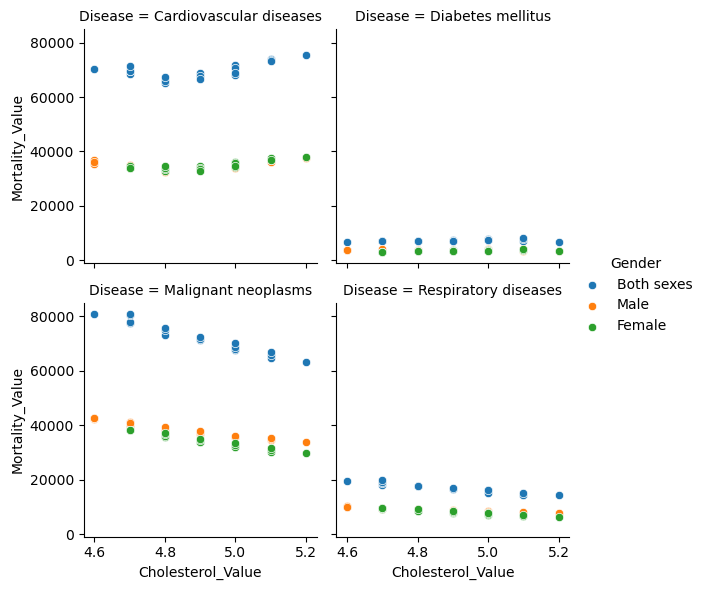

In [339]:
#Correlation between cholesterol and mortality diseases
query_corr_chol = """SELECT c.Country, c.Year, c.Gender,  c.Cholesterol_Value, m.Mortality_Value, m.Disease FROM cholesterol_table c
    JOIN mortality_table m ON c.Year = m.Year AND c.Gender = m.Gender and c.Country=m.Country
    WHERE c.Country = 'Canada' AND c.Year BETWEEN 2000 AND 2018 order by m.Disease, m.Year;"""   

result=pd.read_sql_query(query_corr_chol, engine)
pivot_df = result.pivot_table(index='Year', columns='Disease', values='Mortality_Value', aggfunc='first')
pivot_df = pivot_df.reset_index()
result = pd.merge(result, pivot_df, on='Year', how='left')

g = sns.FacetGrid(result, col="Disease", hue="Gender", col_wrap=2)  
g.map_dataframe(sns.scatterplot, x="Cholesterol_Value", y="Mortality_Value")
g.add_legend()
plt.savefig("604 Project/cholesterol_mortality_pairplot.png", format='png', dpi=300)
plt.show()